<a href="https://colab.research.google.com/github/Lucas-Kuo/VR_DL_HW1/blob/main/VR_DL_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Lucas-Kuo/VR_DL_HW1.git
%cd VR_DL_HW1

Cloning into 'VR_DL_HW1'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 97 (delta 43), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (97/97), done.
/content/VR_DL_HW1


In [ ]:
!pip install gdown
!pip install imutils

In [ ]:
import gdown
# Download the training and testing dataset from my google drive
url = "https://drive.google.com/u/0/uc?id=1dYt4iLy0euxVXordHq4RRHgWojgUjgIf&export=download"
output = "2021VRDL_HW1_datasets.zip"
gdown.download(url, output, quiet=False)

url = "https://drive.google.com/u/0/uc?id=1yV3Bz5hpsJgwpplQARsCxVSnYxsRQALE&export=download"
output = "checkpoints/checkpoints.data-00000-of-00001"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/u/0/uc?id=1dYt4iLy0euxVXordHq4RRHgWojgUjgIf&export=download
To: /content/VR_DL_HW1/2021VRDL_HW1_datasets.zip
100%|██████████| 678M/678M [00:05<00:00, 115MB/s] 
Downloading...
From: https://drive.google.com/u/0/uc?id=1yV3Bz5hpsJgwpplQARsCxVSnYxsRQALE&export=download
To: /content/VR_DL_HW1/checkpoints/checkpoints.data-00000-of-00001
100%|██████████| 265M/265M [00:02<00:00, 116MB/s] 


'checkpoints/checkpoints.data-00000-of-00001'

In [ ]:
!unzip 2021VRDL_HW1_datasets.zip
!mkdir training_images
!mkdir dataset
!mkdir dataset/evaluation
!unzip training_images.zip -d training_images
!unzip testing_images.zip -d dataset/evaluation

串流輸出內容已截斷至最後 5000 行。
  inflating: training_images/2086.jpg  
  inflating: training_images/2089.jpg  
  inflating: training_images/2090.jpg  
  inflating: training_images/2092.jpg  
  inflating: training_images/2101.jpg  
  inflating: training_images/2102.jpg  
  inflating: training_images/2104.jpg  
  inflating: training_images/2105.jpg  
  inflating: training_images/2109.jpg  
  inflating: training_images/2114.jpg  
  inflating: training_images/2115.jpg  
  inflating: training_images/2116.jpg  
  inflating: training_images/2117.jpg  
  inflating: training_images/2121.jpg  
  inflating: training_images/2122.jpg  
  inflating: training_images/2124.jpg  
  inflating: training_images/2125.jpg  
  inflating: training_images/2126.jpg  
  inflating: training_images/2128.jpg  
  inflating: training_images/2129.jpg  
  inflating: training_images/2130.jpg  
  inflating: training_images/2133.jpg  
  inflating: training_images/2134.jpg  
  inflating: training_images/2136.jpg  
  inflating: traini

In [ ]:
!python config.py
!python build_dataset2.py

[INFO] creating 'dataset/training/001.Black_footed_Albatross' directory
[INFO] creating 'dataset/training/002.Laysan_Albatross' directory
[INFO] creating 'dataset/training/003.Sooty_Albatross' directory
[INFO] creating 'dataset/training/004.Groove_billed_Ani' directory
[INFO] creating 'dataset/training/005.Crested_Auklet' directory
[INFO] creating 'dataset/training/006.Least_Auklet' directory
[INFO] creating 'dataset/training/007.Parakeet_Auklet' directory
[INFO] creating 'dataset/training/008.Rhinoceros_Auklet' directory
[INFO] creating 'dataset/training/009.Brewer_Blackbird' directory
[INFO] creating 'dataset/training/010.Red_winged_Blackbird' directory
[INFO] creating 'dataset/training/011.Rusty_Blackbird' directory
[INFO] creating 'dataset/training/012.Yellow_headed_Blackbird' directory
[INFO] creating 'dataset/training/013.Bobolink' directory
[INFO] creating 'dataset/training/014.Indigo_Bunting' directory
[INFO] creating 'dataset/training/015.Lazuli_Bunting' directory
[INFO] creat

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
path = os.path.sep.join(["self_utils", "sample_answer.txt"])
evaluation_filenames = []
with open(path, "r") as f:
  for line in f:
    filename = line.split()[0]
    evaluation_filenames.append(filename)
evaluation_base_dir = os.path.sep.join(["dataset", "evaluation"])

In [ ]:
# initialize the list of class label names
CLASSES = []
CLASS_NAMES_FILE = "classes.txt"
with open(CLASS_NAMES_FILE, "r") as f:
  for line in f:
    line = line[:-1]
    CLASSES.append(line)

In [ ]:
PATH = "dataset"
train_dir = os.path.join(PATH, "training")
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (600, 600)

train_dataset = image_dataset_from_directory(train_dir, shuffle=True, class_names=CLASSES, label_mode="categorical",
                      batch_size=BATCH_SIZE, image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(validation_dir, shuffle=True, class_names=CLASSES, label_mode="categorical",
                          batch_size=BATCH_SIZE, image_size=IMG_SIZE)

Found 2600 files belonging to 200 classes.
Found 400 files belonging to 200 classes.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.RandomContrast(0.5, seed=None)
])

In [ ]:
# preprocess_input = tf.keras.applications.resnet_v2.preprocess_input
preprocess_input = tf.keras.applications.efficientnet.preprocess_input

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
# base_model = tf.keras.applications.ResNet152V2(input_shape=IMG_SHAPE,
#                         include_top=False,
#                         weights='imagenet')
base_model = tf.keras.applications.efficientnet.EfficientNetB7(input_shape=IMG_SHAPE,
                        include_top=False,
                        weights='imagenet')
# base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
#                         include_top=False,
#                         weights='imagenet')

258088960/258076736 [==============================] - 3s 0us/step


In [ ]:
base_model.trainable = False
base_model.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 600, 600, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 600, 600, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 600, 600, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 601, 601, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [ ]:
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
average_layer = tf.keras.layers.AveragePooling2D(pool_size=(19, 19))
prediction_layer = tf.keras.layers.Dense(len(CLASSES), activation="softmax", activity_regularizer=tf.keras.regularizers.L2(0.1))

inputs = tf.keras.Input(shape=(600, 600, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = average_layer(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              # loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 600, 600, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 600, 600, 3)       0         
_________________________________________________________________
efficientnetb7 (Functional)  (None, 19, 19, 2560)      64097687  
_________________________________________________________________
average_pooling2d (AveragePo (None, 1, 1, 2560)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2560)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               655616    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0     

In [ ]:
model.load_weights('./checkpoints/checkpoints')
# loss, acc = model.evaluate(validation_dataset)
# print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

In [ ]:
BATCH_SIZE = 32
testDS = image_dataset_from_directory("dataset/evaluation", labels=None, shuffle=False, label_mode=None, batch_size=BATCH_SIZE, image_size=IMG_SIZE)

Found 3033 files belonging to 1 classes.


In [ ]:
predictions = model.predict(testDS)
output = list(np.argmax(predictions, axis = 1))

In [ ]:
result = {}
N = len(output)
for i in range(N):
  name = testDS.file_paths[i][-8:] # the file path has the format: .../.../xxxx.jpg
  label = CLASSES[output[i]]
  result[name] = label

with open("answer.txt", "w") as f:
  for filename in evaluation_filenames:
    s = filename + ' ' + result[filename] + '\n'
    f.write(s)

In [ ]:
loss, acc = model.evaluate(validation_dataset)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

13/13 [==============================] - 96s 6s/step - loss: 1.0551 - accuracy: 0.7000
Restored model, accuracy: 70.00%


In [ ]:
with open("answer.txt", "w") as f:
  for filename in evaluation_filenames[:10]:
    imagePath = os.path.sep.join([evaluation_base_dir, filename])
    image = tf.io.read_file(imagePath)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = tf.image.resize(image, IMG_SIZE)

    evaluation_list = np.array([image])

    prediction = model.predict(evaluation_list)
    print(prediction[0][106])
    # print(np.argmax(prediction, axis = 1))
    # output = CLASSES[np.argmax(prediction, axis = 1)[0]]
    # print(output)

    answer = f"{filename} {output}\n"
    # print(answer)
    # f.write(answer)

0.19306733
0.1860381
0.18951814
0.18703589
0.18396851
0.18400519
0.18317524
0.18316455
0.1860578
0.18336108


In [ ]:
for filename in evaluation_filenames:
  imagePath = os.path.sep.join([evaluation_base_dir, filename])
  print(imagePath)

In [ ]:
CLASSES[np.argmax(prediction, axis = 1)[0]]

'107.Common_Raven'

In [ ]:
p = "dataset/validation/107.Common_Raven/1305.jpg"
image = tf.io.read_file(imagePath)
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.image.resize(image, IMG_SIZE)

evaluation_list = np.array([image])

prediction = model.predict(evaluation_list)
print(prediction)
# print(np.argmax(prediction, axis = 1))

[[1.83253642e-03 3.26165394e-03 4.36856262e-02 1.99896842e-03
  1.83178694e-03 2.79531046e-03 2.64943833e-03 1.37944808e-02
  1.48126259e-04 6.77814260e-02 1.52803294e-03 7.40342730e-05
  7.64668453e-04 4.99661407e-03 2.48638185e-04 2.32873572e-05
  1.06923471e-04 4.33843634e-05 4.34838614e-04 7.83515788e-05
  5.49688062e-04 2.58730166e-03 7.44734250e-04 1.73736503e-03
  1.69626798e-03 7.92299921e-04 6.38777716e-03 1.01811753e-03
  2.90504145e-03 1.35420240e-03 1.98896625e-03 2.73187121e-04
  2.58404668e-03 2.74207938e-04 1.06570881e-03 1.20568402e-04
  1.78066752e-04 1.05587118e-04 5.85435133e-04 3.10077029e-03
  5.70647512e-03 3.70273774e-04 4.94936807e-03 2.75801891e-03
  6.40977034e-03 6.75225107e-04 8.76675081e-03 2.54210527e-03
  7.21489545e-03 1.41328305e-03 1.50756142e-03 4.23846213e-04
  5.11450507e-03 2.53789756e-03 4.42981807e-04 1.11687623e-04
  7.09917513e-05 6.60009496e-03 1.50195765e-03 3.66919936e-04
  1.18628831e-03 1.34415994e-03 2.79006897e-03 9.65284766e-04
  4.9146

In [ ]:
evaluation_list = []
for filename in evaluation_filenames:
  imagePath = os.path.sep.join([evaluation_base_dir, filename])
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_png(image, channels=3)
  image = tf.image.convert_image_dtype(image, dtype=tf.float32)
  image = tf.image.resize(image, IMG_SIZE)
  evaluation_list.append(image)

evaluation_list = np.array(evaluation_list)

In [ ]:
predictions = model.predict(evaluation_list)
predictions = np.argmax(predictions, axis=1)
predictions.shape

In [ ]:
len(base_model.layers)

813

In [ ]:
base_model.trainable = True

fine_tune_at = 700

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])
model.summary()
len(model.trainable_variables)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 600, 600, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 600, 600, 3)       0         
_________________________________________________________________
efficientnetb7 (Functional)  (None, 19, 19, 2560)      64097687  
_________________________________________________________________
average_pooling2d (AveragePo (None, 1, 1, 2560)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2560)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               655616    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


105

In [ ]:
fine_tune_epochs = 30
finetune_history = model.fit(train_dataset,
          epochs=fine_tune_epochs,
          validation_data=validation_dataset)

Epoch 1/30
82/82 [==============================] - 773s 9s/step - loss: 0.4491 - accuracy: 0.8900 - val_loss: 0.9734 - val_accuracy: 0.7350
Epoch 2/30
82/82 [==============================] - 714s 9s/step - loss: 0.3590 - accuracy: 0.9108 - val_loss: 1.1237 - val_accuracy: 0.7125
Epoch 3/30
82/82 [==============================] - 712s 9s/step - loss: 0.3083 - accuracy: 0.9331 - val_loss: 1.0270 - val_accuracy: 0.7675
Epoch 4/30
82/82 [==============================] - 712s 9s/step - loss: 0.2766 - accuracy: 0.9404 - val_loss: 1.0354 - val_accuracy: 0.7575
Epoch 5/30
82/82 [==============================] - 712s 9s/step - loss: 0.2490 - accuracy: 0.9508 - val_loss: 1.0319 - val_accuracy: 0.7625
Epoch 6/30
82/82 [==============================] - 709s 9s/step - loss: 0.2354 - accuracy: 0.9542 - val_loss: 1.0274 - val_accuracy: 0.7600
Epoch 7/30
74/82 [==========================>...] - ETA: 1:02 - loss: 0.2128 - accuracy: 0.9654

ResourceExhaustedError: ignored

In [ ]:
model.save_weights('./checkpoints2')

In [ ]:
acc = finetune_history.history['accuracy']
val_acc = finetune_history.history['val_accuracy']

loss = finetune_history.history['loss']
val_loss = finetune_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy(fine tuned)')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,6.0])
plt.title('Training and Validation Loss(fine tuned)')
plt.xlabel('epoch')
plt.show()

In [ ]:
initial_epochs = 30

# checkpoint_path = "training_1/cp.ckpt"
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

history = model.fit(train_dataset,
          epochs=initial_epochs,
          validation_data=validation_dataset)
# os.makedirs('./checkpoints')
# model.save_weights('./checkpoints/first_checkpoint')

Epoch 1/30
55/55 [==============================] - 645s 11s/step - loss: 4.9032 - accuracy: 0.0538 - val_loss: 3.9461 - val_accuracy: 0.2175
Epoch 2/30
55/55 [==============================] - 571s 10s/step - loss: 3.5331 - accuracy: 0.2000 - val_loss: 2.7510 - val_accuracy: 0.3950
Epoch 3/30
55/55 [==============================] - 572s 10s/step - loss: 2.6947 - accuracy: 0.3277 - val_loss: 2.2238 - val_accuracy: 0.4775
Epoch 4/30
55/55 [==============================] - 569s 10s/step - loss: 2.2189 - accuracy: 0.4296 - val_loss: 1.8993 - val_accuracy: 0.5450
Epoch 5/30
55/55 [==============================] - 572s 10s/step - loss: 1.8966 - accuracy: 0.4965 - val_loss: 1.7270 - val_accuracy: 0.5800
Epoch 6/30
55/55 [==============================] - 572s 10s/step - loss: 1.6755 - accuracy: 0.5415 - val_loss: 1.6109 - val_accuracy: 0.5825
Epoch 7/30
55/55 [==============================] - 572s 10s/step - loss: 1.4597 - accuracy: 0.6092 - val_loss: 1.4976 - val_accuracy: 0.6025
Epoch 

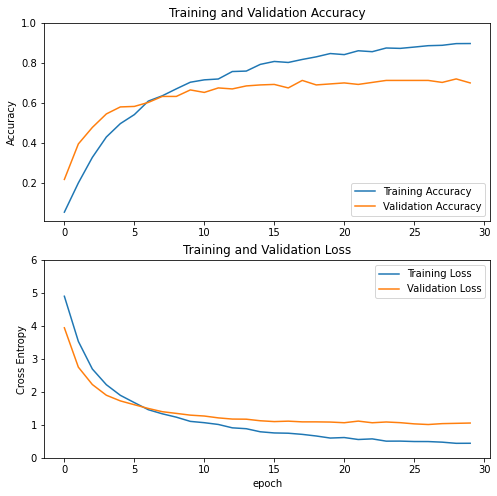

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,6.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:

model.save_weights('./checkpoints')

# From here on, EfficientNetB4 is used

In [ ]:
PATH = "dataset"
train_dir = os.path.join(PATH, "training")
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (380, 380)

train_dataset = image_dataset_from_directory(train_dir, shuffle=True, class_names=CLASSES, label_mode="categorical",
                      batch_size=BATCH_SIZE, image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(validation_dir, shuffle=True, class_names=CLASSES, label_mode="categorical",
                          batch_size=BATCH_SIZE, image_size=IMG_SIZE)

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

Found 2600 files belonging to 200 classes.
Found 400 files belonging to 200 classes.


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.RandomContrast(0.5, seed=None)
])

preprocess_input = tf.keras.applications.efficientnet.preprocess_input

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.efficientnet.EfficientNetB4(input_shape=IMG_SHAPE,
                        include_top=False,
                        weights='imagenet')
base_model.trainable = False
base_model.summary()

71696384/71686520 [==============================] - 1s 0us/step
Model: "efficientnetb4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 380, 380, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 380, 380, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 380, 380, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 381, 381, 3)  0           normalization[0][0]              
____________________

In [ ]:
average_layer = tf.keras.layers.AveragePooling2D(pool_size=(12, 12))
prediction_layer = tf.keras.layers.Dense(len(CLASSES), activation="softmax", activity_regularizer=tf.keras.regularizers.L2(0.1))

inputs = tf.keras.Input(shape=(380, 380, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = average_layer(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              # loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 380, 380, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 380, 380, 3)       0         
_________________________________________________________________
efficientnetb4 (Functional)  (None, 12, 12, 1792)      17673823  
_________________________________________________________________
average_pooling2d (AveragePo (None, 1, 1, 1792)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               459008    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0     

In [ ]:
initial_epochs = 50
history = model.fit(train_dataset,
          epochs=initial_epochs,
          validation_data=validation_dataset)

Epoch 1/50
82/82 [==============================] - 141s 1s/step - loss: 4.8327 - accuracy: 0.0608 - val_loss: 3.6206 - val_accuracy: 0.3075
Epoch 2/50
82/82 [==============================] - 89s 1s/step - loss: 3.1922 - accuracy: 0.2585 - val_loss: 2.3874 - val_accuracy: 0.4250
Epoch 3/50
82/82 [==============================] - 89s 1s/step - loss: 2.3679 - accuracy: 0.4012 - val_loss: 1.9467 - val_accuracy: 0.5300
Epoch 4/50
82/82 [==============================] - 90s 1s/step - loss: 1.9437 - accuracy: 0.5004 - val_loss: 1.7311 - val_accuracy: 0.5850
Epoch 5/50
82/82 [==============================] - 90s 1s/step - loss: 1.6992 - accuracy: 0.5550 - val_loss: 1.5404 - val_accuracy: 0.6175
Epoch 6/50
82/82 [==============================] - 90s 1s/step - loss: 1.5212 - accuracy: 0.5846 - val_loss: 1.4579 - val_accuracy: 0.6375
Epoch 7/50
82/82 [==============================] - 90s 1s/step - loss: 1.2984 - accuracy: 0.6554 - val_loss: 1.3812 - val_accuracy: 0.6350
Epoch 8/50
82/82 [=

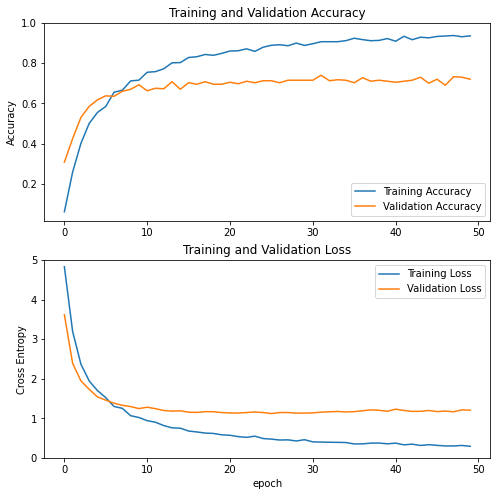

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.save_weights('./Enet_B4_checkpoint/B4_checkpoints')

In [ ]:
loss, acc = model.evaluate(validation_dataset)
print("Acc of validation: {:5.2f}%".format(acc * 100))

13/13 [==============================] - 12s 878ms/step - loss: 1.2033 - accuracy: 0.7200
Acc of validation: 72.00%


In [ ]:
p = "dataset/training/087.Mallard/0712.jpg"
image = tf.io.read_file(p)
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.image.resize(image, IMG_SIZE)

evaluation_list = np.array([image])

prediction = model.predict(validation_dataset)
# print(prediction)
print(np.argmax(prediction, axis = 1))

[ 83 154 143 130  70 187 103 139  43  78  42  67   3 160 149 110 121  77
 131  54  93  30  59 152 176  30 160  85   2  79  65  99 155 116 153 197
  84  48 151 132  57 195 194 105 113  33   1  62  29  44 193  38 138  11
  32 174  74 171  88  62  27 180   4  83 125 178 116  88 160  45 148 151
  48  50  17 104  28  97 136 161 193   5 149  14  76 106  91 147  34 145
  45 140   9  98  59  56  26 159  35   8 172  90  40  72 167  60  63 151
 123 141 170 137  41 114  38  11   0 101 182 133  98 171  53 146 198  69
 114  51  15  28  25 133  31  71  19  51 102 104   1  73  81 182 130  55
 147 110 144  15  46 165  39  40 119  55 174  67  99  93   0  20  73 159
 116 197 181 150 163 143 128  12  58  34  27  64 146  66   7 109 127 185
 114 178   8 191  74 105 180 135  52 188 184  38 169 190  33 166 187  49
  86 102  78  13   6 122 111  22  92  82  67 143 194  37 183  39 174 176
 163 177 186 172  90 190  27 130 135  49 139 108 101 177  62 191 192  75
 103 129 169  47 111 157  56  13 172  53 107  12 11

In [ ]:
print(prediction[0][66])
print(np.argmax(prediction, axis = 1))


0.2739835
[66]


(1, 380, 380, 3)

In [ ]:
def load_images(imagePath):
  # read the image from disk, decode it, convert the data type to
  # floating point, and resize it
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_png(image, channels=3)
  image = tf.image.convert_image_dtype(image, dtype=tf.float32)
  image = tf.image.resize(image, IMG_SIZE)

  # parse the class label from the file path
  label = None

  # return the image and the label
  return (image, label)

In [ ]:
from imutils import paths

In [ ]:
testPaths = list(paths.list_images("dataset/evaluation"))

In [ ]:
# build the testing dataset and data input pipeline
testDS = tf.data.Dataset.from_tensor_slices(testPaths)
testDS = (testDS
	.map(load_images, num_parallel_calls=AUTOTUNE)
	.cache()
	.batch(32)
	.prefetch(AUTOTUNE)
)

In [ ]:
BATCH_SIZE = 32
testDS = image_dataset_from_directory("dataset/evaluation", labels=None, shuffle=False, label_mode=None, batch_size=BATCH_SIZE, image_size=IMG_SIZE)

Found 3033 files belonging to 1 classes.


In [ ]:
predictions = model.predict(testDS)

In [ ]:
print(np.argmax(predictions, axis = 1))

[103 133  16 ... 120  70  39]


In [ ]:
output = list(np.argmax(predictions, axis = 1))

In [ ]:
print(testDS.file_paths[0])
# print(testDS.)

dataset/evaluation/0001.jpg


In [ ]:
result = {}
N = len(output)
for i in range(N):
  name = testDS.file_paths[i][-8:]
  label = CLASSES[output[i]]
  result[name] = label

In [ ]:
result["3306.jpg"]

'089.Hooded_Merganser'

In [ ]:
with open("answer.txt", "w") as f:
  for filename in evaluation_filenames:
    s = filename + ' ' + result[filename] + '\n'
    f.write(s)